Họ và tên: Phạm Đức Thể

MSSV: 19522253

Lớp: DS300.N11

FINAL PROJECT - 18/11/2022

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1eK3n3PGZi29nLARx41dhts7JveC8Zf6T?usp=sharing)

# **FINAL PROJECT - BOOKING RECOMMENDATION SYSTEM**

## **Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
import time
import datetime
import random
import nltk
nltk.download('stopwords')
nltk.download('punkt')


from tqdm import tqdm
from bs4 import BeautifulSoup
from sklearn.metrics.pairwise import cosine_similarity
from numpy.linalg import norm
from numpy import dot
from numpy import sqrt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

sns.set()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
PATH = '/content/drive/MyDrive/Dataset/DS300.N11/Final Project/'
LOCATION = ['Đà Lạt', 'Hà Nội', 'TP. Hồ Chí Minh', 'Vũng Tàu', 'Đà Nẵng', 'Phú Quốc', 'Hội An', 'Nha Trang', 'Sa Pa', 'Huế']

## **Read dataset**

In [ ]:
ratings = pd.read_csv(PATH+'/hotels_users_ratings.csv')
ratings

,URL Hotel,Location,HotelID,Name Hotel,Descriptions,Address,UserID,User,Rating
0,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",1187,Thảo,6
1,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",1284,Tran,5
2,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",5866,Tho,6
3,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",3033,Tuan,9
4,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",1406,Phan,7
...,...,...,...,...,...,...,...,...,...
38796,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",2190,Linh,6
38797,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",1530,Anh,9
38798,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",1308,Phong,7
38799,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",6009,Hạnh,6


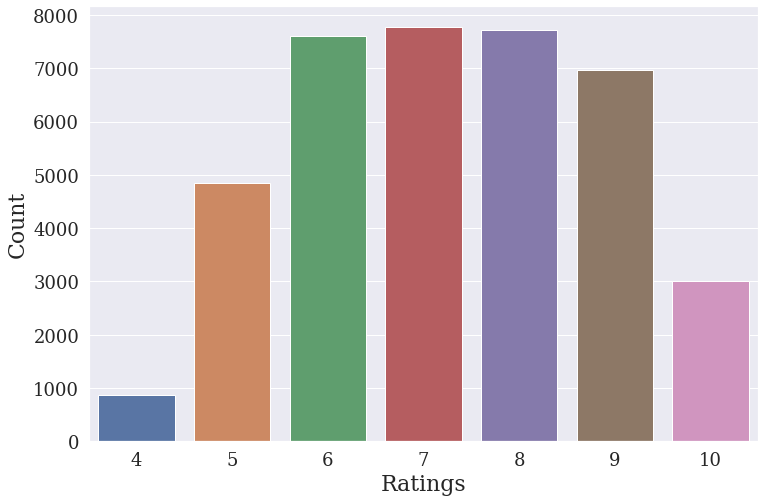

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x=ratings["Rating"])

plt.xlabel('Ratings', fontsize=22, fontfamily='serif')
plt.ylabel('Count', fontsize=22, fontfamily='serif')

plt.xticks(fontsize=18, fontfamily='serif')
plt.yticks(fontsize=18, fontfamily='serif')

plt.show()

In [ ]:
ratings_user = pd.read_csv(PATH+'/train_total_by_user_38k1.csv')
ratings_user

,URL Hotel,Location,HotelID,Name Hotel,Descriptions,Address,UserID,User,Rating
0,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",1187,Thảo,6
1,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",5866,Tho,6
2,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",3033,Tuan,9
3,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",1406,Phan,7
4,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",841,Hong,8
...,...,...,...,...,...,...,...,...,...
38061,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",2190,Linh,6
38062,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",1530,Anh,9
38063,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",1308,Phong,7
38064,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",6009,Hạnh,6


In [ ]:
ratings_item = pd.read_csv(PATH+'/train_total_by_item_32k3.csv')
ratings_item

,URL Hotel,Location,HotelID,Name Hotel,Descriptions,Address,UserID,User,Rating
0,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",3033,Tuan,9
1,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",1406,Phan,7
2,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",841,Hong,8
3,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",335,Thanh,6
4,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",3170,Vu,7
...,...,...,...,...,...,...,...,...,...
32268,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",2190,Linh,6
32269,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",1530,Anh,9
32270,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",1308,Phong,7
32271,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",6009,Hạnh,6


In [ ]:
ratings_cb = pd.read_csv(PATH+'/train_total_cb_34k9.csv')
ratings_cb

,URL Hotel,Location,HotelID,Name Hotel,Descriptions,Address,UserID,User,Rating
0,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",5866,Tho,6
1,https://www.booking.com/hotel/vn/tropicana-2.v...,Đà Lạt,1173,Miền Nhiệt Đới 2 Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Quảng trườn...","64 Phan Nhu Thach, ward 1, Đà Lạt, Việt Nam",4384,Cát,9
2,https://www.booking.com/hotel/vn/tropicana-2.v...,Đà Lạt,1173,Miền Nhiệt Đới 2 Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Quảng trườn...","64 Phan Nhu Thach, ward 1, Đà Lạt, Việt Nam",5085,Kiều,5
3,https://www.booking.com/hotel/vn/tropicana-2.v...,Đà Lạt,1173,Miền Nhiệt Đới 2 Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Quảng trườn...","64 Phan Nhu Thach, ward 1, Đà Lạt, Việt Nam",557,Thuận,7
4,https://www.booking.com/hotel/vn/tropicana-2.v...,Đà Lạt,1173,Miền Nhiệt Đới 2 Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Quảng trườn...","64 Phan Nhu Thach, ward 1, Đà Lạt, Việt Nam",6024,Do,7
...,...,...,...,...,...,...,...,...,...
34907,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",2190,Linh,6
34908,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",1530,Anh,9
34909,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",1308,Phong,7
34910,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",6009,Hạnh,6


In [ ]:
ratings_test_user = pd.read_csv(PATH+'/test_by_user_695.csv')
ratings_test_user

,URL Hotel,Location,HotelID,Name Hotel,Descriptions,Address,UserID,User,Rating
0,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",1284,Tran,5
1,https://www.booking.com/hotel/vn/raon-valley-v...,Đà Lạt,3890,Raon Villa,"Tọa lạc tại thành phố Đà Lạt, cách CLB chơi go...","44D Trần Khánh Dư, Phường 8, Đà Lạt, Việt Nam",1284,Tran,6
2,https://www.booking.com/hotel/vn/raon-valley-v...,Đà Lạt,3890,Raon Villa,"Tọa lạc tại thành phố Đà Lạt, cách CLB chơi go...","44D Trần Khánh Dư, Phường 8, Đà Lạt, Việt Nam",1284,Tran,7
3,https://www.booking.com/hotel/vn/raon-villa-da...,Đà Lạt,3288,Raon Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Công viên Y...","42 Tô Hiến Thành, Phường 3, Đà Lạt, Việt Nam",1284,Tran,8
4,https://www.booking.com/hotel/vn/wasabi-house....,Đà Lạt,4388,Wasabi House - Phương Anh Homestay,"Tọa lạc ở thành phố Đà Lạt, cách Quảng trường ...","20/2 Phan Như Thạch, Đà Lạt, Việt Nam",1284,Tran,7
...,...,...,...,...,...,...,...,...,...
690,https://www.booking.com/hotel/vn/vinpearl-hue-...,Huế,2403,Melia Vinpearl Hue,Trong số các tiện nghi của chỗ nghỉ này có nhà...,"50A Hung Vuong Street, Huế, Việt Nam",335,Thanh,10
691,https://www.booking.com/hotel/vn/senna-hue.vi....,Huế,4443,Senna Hue Hotel,"Khách sạn 5 sao này cũng có WiFi miễn phí, vườ...","7 Nguyễn Tri Phương, phường Phú Hội, Tp Huế 7 ...",335,Thanh,8
692,https://www.booking.com/hotel/vn/na-na-homesta...,Huế,2259,Nana Homestay & Villa,"Nằm cách Chợ Đông Ba 1,4 km, Nana Homestay & V...","26/1/147 Phan Đình Phùng 3, Huế, Việt Nam",335,Thanh,6
693,https://www.booking.com/hotel/vn/nana-2-homest...,Huế,3735,Nana 2 Homestay,Tọa lạc tại thành phố Huế với Chợ Đông Ba và C...,"14/42 Nguyễn Công Trứ, Phường Phú Hội, Huế, Vi...",335,Thanh,5


In [ ]:
ratings_test_item = pd.read_csv(PATH+'/test_by_item_5k7.csv')
ratings_test_item

,URL Hotel,Location,HotelID,Name Hotel,Descriptions,Address,UserID,User,Rating
0,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",1187,Thảo,6
1,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",1284,Tran,5
2,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",5866,Tho,6
3,https://www.booking.com/hotel/vn/tropicana-2.v...,Đà Lạt,1173,Miền Nhiệt Đới 2 Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Quảng trườn...","64 Phan Nhu Thach, ward 1, Đà Lạt, Việt Nam",4384,Cát,9
4,https://www.booking.com/hotel/vn/tropicana-2.v...,Đà Lạt,1173,Miền Nhiệt Đới 2 Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Quảng trườn...","64 Phan Nhu Thach, ward 1, Đà Lạt, Việt Nam",6110,Đỗ,7
...,...,...,...,...,...,...,...,...,...
5743,https://www.booking.com/hotel/vn/hung-long-hos...,Huế,1083,Hưng Long Hostel,Tất cả phòng nghỉ tại đây đều có khu vực ghế n...,"Trần Quang Khải 5 kiệt 6, Huế, Việt Nam",5131,Hoàng,8
5744,https://www.booking.com/hotel/vn/hung-long-hos...,Huế,1083,Hưng Long Hostel,Tất cả phòng nghỉ tại đây đều có khu vực ghế n...,"Trần Quang Khải 5 kiệt 6, Huế, Việt Nam",5310,Duncan,9
5745,https://www.booking.com/hotel/vn/pinehill-tu-h...,Huế,2196,Pinehill Tu Hieu Hue Homestay,"Các căn tại đây có tầm nhìn ra vườn, khu vực g...","72 C Le Ngo Cat Thuy Xuan, Huế, Việt Nam",1835,Liên,6
5746,https://www.booking.com/hotel/vn/pinehill-tu-h...,Huế,2196,Pinehill Tu Hieu Hue Homestay,"Các căn tại đây có tầm nhìn ra vườn, khu vực g...","72 C Le Ngo Cat Thuy Xuan, Huế, Việt Nam",1506,Tính,7


In [ ]:
ratings_test_cb = pd.read_csv(PATH+'test_cb_3k7.csv')
ratings_test_cb

,URL Hotel,Location,HotelID,Name Hotel,Descriptions,Address,UserID,User,Rating
0,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",1187,Thảo,6
1,https://www.booking.com/hotel/vn/green-meadow-...,Đà Lạt,3517,Green Meadow Hotel & Villa Dalat,"Tọa lạc tại thành phố Đà Lạt, cách Quảng trườn...","20 Nguyen Viet Xuan, Ward 4, Đà Lạt, Việt Nam",1187,Thảo,7
2,https://www.booking.com/hotel/vn/villadecelia....,Đà Lạt,2971,VILLADECELIA,Biệt thự cung cấp miễn phí cả WiFi lẫn chỗ đỗ ...,"98 Đường Thông Thiên Học, Đà Lạt, Việt Nam",1187,Thảo,10
3,https://www.booking.com/hotel/vn/wasabi-house....,Đà Lạt,4388,Wasabi House - Phương Anh Homestay,"Tọa lạc ở thành phố Đà Lạt, cách Quảng trường ...","20/2 Phan Như Thạch, Đà Lạt, Việt Nam",1187,Thảo,5
4,https://www.booking.com/hotel/vn/silent-night-...,Đà Lạt,2040,Silent Night Dem Lanh Hotel,Tọa lạc tại vị trí thuận tiện ở khu Hồ Xuân Hư...,"05 Pham Ngu Lao, Ward 1, Đà Lạt, Việt Nam",1187,Thảo,5
...,...,...,...,...,...,...,...,...,...
3690,https://www.booking.com/hotel/vn/la-perle.vi.h...,Huế,1875,Hotel La Perle,Tọa lạc ở khu trung tâm ồn ào và náo nhiệt của...,"24 lane 42 Nguyen Cong Tru street, Huế, Việt Nam",640,Thu,8
3691,https://www.booking.com/hotel/vn/mondial-hue.v...,Huế,3450,Mondial Hotel,Mondial Hotel Hue cung cấp chỗ ở hiện đại ở tr...,"17 Nguyen Hue, 530000 Huế, Việt Nam",640,Thu,8
3692,https://www.booking.com/hotel/vn/la-paix-hue-r...,Huế,2433,La Paix Hue,"Nằm trong bán kính 3,7 km từ Chợ Đông Ba và 3,...","No 8, Lane 139 Nguyen Sinh Cung St, Vy Da Ward...",640,Thu,10
3693,https://www.booking.com/hotel/vn/mondial-hue.v...,Huế,3450,Mondial Hotel,Mondial Hotel Hue cung cấp chỗ ở hiện đại ở tr...,"17 Nguyen Hue, 530000 Huế, Việt Nam",640,Thu,4


In [ ]:
hotels_merge = pd.read_csv(PATH+'data_cb_merge.csv')
hotels_merge

,UserID,Location,Name Hotel,Descriptions
0,1187,Đà Lạt,"Dalat Venus Hotel,Savio House,Casanova Dalat H...","Tọa lạc tại thành phố Đà Lạt, cách Quảng trườn..."
1,1284,Đà Lạt,"River Park Hotel Dalat,Thien Ly Hotel,Moc Tra ...",River Park Hotel Dalat tọa lạc tại thành phố Đ...
2,3033,Đà Lạt,"Dalat Rose Hill Villa - Moutain View,TTC Dream...","Tọa lạc tại thành phố Đà Lạt, cách Vườn Hoa Đà..."
3,1406,Đà Lạt,"Thảo Nguyên,Lantana Homestay,CSLTDL Minh Hùng,...","Chỗ nghỉ này nằm trong bán kính khoảng 2,5 km ..."
4,841,Đà Lạt,"Nature Boutique Hotel,Dalat Venus Hotel,Thien ...","Tọa lạc tại thành phố Đà Lạt, cách sân golf Da..."
...,...,...,...,...
734,1284,Huế,"Thuy Duong Boutique Hotel Hue,Poetic Hue Hotel...","Nằm gần Sông Hương, Thuy Duong Boutique Hotel ..."
735,1698,Huế,"Tam Tinh Vien Homestay,Lacasa Homestay,OYO 882...",Du khách sẽ có dịp đóng góp cho hoạt động thiệ...
736,3990,Huế,"Shine Homestay,Ngoc Binh Hotel,Minh Tam Guesth...",4 km from Trang Tien Bridge. This 1-star hotel...
737,6130,Huế,"Q' Garden Homestay Villa,5H homestay,Forest Ta...","Nằm cách Cầu Tràng Tiền 2,9 km, Q' Garden Home..."


## **Collaborative Filtering**

### **Based on User**

#### **Modeling**

In [ ]:
# Chuyển bảng ratings sang dataframe với các cột là "UserID" và các hàng là "HotelID" (*)
ratings_user_df = ratings_user.pivot_table(index='HotelID', columns='UserID')['Rating'].fillna(0)
ratings_user_df

UserID,1,2,3,4,5,6,7,8,9,10,...,6462,6463,6464,6465,6466,6467,6468,6469,6470,6471
HotelID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Lấy ra rating của 1 user cho 1 hotel
def get_rating_user(userid, hotelid):
  return (ratings_user.loc[(ratings_user.UserID==userid) & (ratings_user.HotelID==hotelid), 'Rating'].iloc[0])

In [ ]:
get_rating_user(2190,135)

6

In [ ]:
def pearson_correlation_score_user(user1, user2, location):
  both_rating_count = [] # Danh sách các hotel được đánh giá chung bởi user1 và user2
  list_hotel_user1 = ratings_user.loc[(ratings_user.UserID == user1) & (ratings_user.Location == location), 'HotelID'].to_list()
  list_hotel_user2 = ratings_user.loc[(ratings_user.UserID == user2) & (ratings_user.Location == location), 'HotelID'].to_list()

  for hotelid in list_hotel_user1:
    if hotelid in list_hotel_user2:
      both_rating_count.append(hotelid)

  if len(both_rating_count)==0:
    return 0
  
  avg_rating_1 = np.average([get_rating_user(user1, i) for i in both_rating_count]) # rating trung bình user1
  avg_rating_2 = np.average([get_rating_user(user2, i) for i in both_rating_count]) # rating trung bình user2

  TuSo = sum([(get_rating_user(user1, i) - avg_rating_1)*(get_rating_user(user2, i) - avg_rating_2) for i in both_rating_count])
  MauSo = sqrt(sum((get_rating_user(user1, i) - avg_rating_1)**2 for i in both_rating_count))*sqrt(sum((get_rating_user(user2, i) - avg_rating_2)**2 for i in both_rating_count))

  if MauSo==0:
    return 0
  
  return TuSo/MauSo

In [ ]:
pearson_correlation_score_user(1187,1284,LOCATION[1])

1.0000000000000002

In [ ]:
def distance_similarity_score_user(user1, user2, location):
  both_rating_count = 0
  list_hotel_user1 = ratings_user.loc[(ratings_user.UserID == user1) & (ratings_user.Location == location), 'HotelID'].tolist()
  list_hotel_user2 = ratings_user.loc[(ratings_user.UserID == user2) & (ratings_user.Location == location), 'HotelID'].tolist()

  for hotelid in list_hotel_user1:
    if hotelid in list_hotel_user2:
      both_rating_count += 1
  
  if both_rating_count == 0:
    return 0

  rating1 = []
  rating2 = []

  for hotelid in list_hotel_user1:
    if hotelid in list_hotel_user2:
      rating1.append(get_rating_user(user1, hotelid))
      rating2.append(get_rating_user(user2, hotelid))
  
  # print(rating1)
  # print(rating2)

  return dot(rating1, rating2)/(norm(rating1)*norm(rating2))

In [ ]:
print('Distance based similarity between user ids X & u1: {}'.format(distance_similarity_score_user(1308,1530, LOCATION[0])))
print('Distance based similarity between user ids X & u2: {}'.format(distance_similarity_score_user(1308,5564, LOCATION[1])))
print('Distance based similarity between user ids X & u3: {}'.format(distance_similarity_score_user(1308,6009, LOCATION[2])))

Distance based similarity between user ids X & u1: 0.9963980072059785
Distance based similarity between user ids X & u2: 1.0
Distance based similarity between user ids X & u3: 0


In [ ]:
# Danh sách các khách sạn đã rating bởi người dùng
def get_hotelids(userid, location):
  return (ratings_user.loc[(ratings_user.UserID==userid) & (ratings_user.Location == location), 'HotelID'].tolist())

In [ ]:
print(get_hotelids(1308, LOCATION[0]))

[175, 1455, 1542, 3124, 506, 3372, 87, 575, 292, 4322, 903, 2224, 903, 1177, 2083, 2083, 3571, 28, 28]


In [ ]:
# Lấy ra tên của một khách sạn
def get_name_hotel(hotelid):
  return (ratings_user.loc[(ratings_user.HotelID==hotelid), 'Name Hotel'].iloc[0])

In [ ]:
get_name_hotel(50)

'Sapa Tatu Homestay'

In [ ]:
def most_similar_user(user1, number_of_user, location, similarity_name):
  userid = ratings_user.UserID.unique().tolist()
  # print(len(userid))

  if similarity_name == 'pearson':
    similarity_score =  [(pearson_correlation_score_user(user1, user_i, location), user_i) for user_i in userid if user_i != user1]

  if similarity_name == 'cosine':
    similarity_score =  [(distance_similarity_score_user(user1, user_i, location), user_i) for user_i in userid if user_i != user1]

  similarity_score.sort() # Tăng dần
  similarity_score.reverse() # Giảm dần

  return similarity_score[:number_of_user] # Có thể thay đổi số lượng lân cận

In [ ]:
%%time
list_user_popular = most_similar_user(1308, 10, LOCATION[0], "pearson")
list_user_popular

CPU times: user 49.6 s, sys: 242 ms, total: 49.9 s
Wall time: 56 s


[(1.0000000000000002, 295),
 (1.0, 5915),
 (1.0, 4797),
 (1.0, 2770),
 (1.0, 1530),
 (0.9999999999999998, 640),
 (0, 6471),
 (0, 6470),
 (0, 6469),
 (0, 6468)]

In [ ]:
# Lấy ra danh sách khuyến nghị từ top populars
def get_recommendation_based_on_user(userid, number_of_user, location, similarity_name):#topN, 
  total = {}
  sum_similarity = {}
  list_user_popular = most_similar_user(userid, number_of_user, location, similarity_name)

  # Iterating over subset of user ids.
  for similarityName, user in list_user_popular:
    score = similarityName
    hotelids = get_hotelids(user, location) 

    for hotelid in hotelids: # -> Danh sách các id hotel đã xem bởi user khác và khởi tạo giá trị = 0
      if hotelid not in get_hotelids(userid, location):
        total[hotelid] = 0
        sum_similarity[hotelid] = 0

    for hotelid in hotelids: #-> Danh sách các id hotel đã xem bởi user khác
      if hotelid not in get_hotelids(userid, location):
        total[hotelid] += get_rating_user(user, hotelid)*score
        sum_similarity[hotelid] += score

  # Normalizing ratings
  ranking = []
  for userid,tot in total.items():
    if sum_similarity[userid] == 0:
      ranking.append((0,userid))
    else:
      rating = tot/(sum_similarity[userid])
      ranking.append((rating,userid))
  # ranking = [(tot/sum_similarity[hotelid], hotelid) for hotelid, tot in total.items()]
  ranking.sort()
  ranking.reverse()

  recommendations = [(get_name_hotel(hotelid), hotelid, score) for score, hotelid in ranking] #

  return recommendations#[:topN]

In [ ]:
%%time
get_recommendation_based_on_user(1187, 10, LOCATION[0], 'pearson')

CPU times: user 43.9 s, sys: 180 ms, total: 44.1 s
Wall time: 44 s


[('Homstay An Nhien', 4469, 10.0),
 ('Da Lat Ngoi Sao Viet', 4237, 10.0),
 ('Đỗ Gia Bảo Villa', 4146, 10.0),
 ("Karry's House", 4135, 10.0),
 ('Aki 秋 Hostel', 3968, 10.0),
 ('CSLT HÀ THANH TÙNG', 3111, 10.0),
 ('Hoang Lam Villa', 2023, 10.0),
 ('Đà Lạt Sunshine Garden', 1925, 10.0),
 ('Memory Inn Dalat', 1628, 10.0),
 ('Hot home 2 - Phan Đinh Phung', 947, 10.0),
 ('Bảo Thịnh 2 Hotel', 475, 10.0),
 ('THIEN AN GUEST HOUSE', 442, 10.0),
 ('La Em Boutique Villa', 292, 10.0),
 ('Maison de Fleurs - Ngôi Nhà Hoa', 4477, 9.0),
 ('An Garden Dalat', 4402, 9.0),
 ('Mi Casa Homestay', 4368, 9.0),
 ('The 1954 House', 4360, 9.0),
 ('Be U Hotel', 4351, 9.0),
 ('Kim Minh House', 4319, 9.0),
 ("N'Queen Villa", 4233, 9.0),
 ('Minh Quan Hotel', 4191, 9.0),
 ('Len’s hostel', 3946, 9.0),
 ('Nguyễn Tài Hostel & Coffee Đà Lạt', 3920, 9.0),
 ('Vuon Hoa Hong (Rosary)', 3870, 9.0),
 ('CaLi Nguyen', 3835, 9.0),
 ('NhaCuaMeHomestay', 3624, 9.0),
 ('City Pass Da Lat', 3465, 9.0),
 ('Khách Sạn Tommy', 3413, 9.0),
 

In [ ]:
%%time
get_recommendation_based_on_user(1187, 10, LOCATION[0], 'cosine')

CPU times: user 42.6 s, sys: 150 ms, total: 42.7 s
Wall time: 43.9 s


[('An Gia', 4085, 10.0),
 ('Grey House', 3429, 10.0),
 ('Guesthouse Thắng Linh', 3156, 10.0),
 ("Jessy's Green House Da Lat", 1232, 10.0),
 ('Spring Hotel', 87, 10.0),
 ('The Art - An Yên Villa', 3636, 9.0),
 ('An Lai Hotel', 3599, 9.0),
 ('Wisteria Hotel', 2913, 9.0),
 ('Homeland Hotel', 2907, 9.0),
 ('Homestay BỒ CÔNG ANH', 2904, 9.0),
 ('Thien Phu Guesthouse Dalat', 2557, 9.0),
 ('CozyNook Boutique Apartments - 3 thang 2 Street', 2391, 9.0),
 ('DALAT STREAM HOTEL-Khách sạn đẹp Đà Lạt', 2308, 9.0),
 ('Villa 16 Nguyễn Viết Xuân', 2264, 9.0),
 ('Golden Bee Hotel', 1968, 9.0),
 ('Moonstone Hotel Dalat', 1377, 9.0),
 ('Dalat Terrasse Des Roses Villa', 1176, 9.0),
 ('The Orchid Villa Dalat', 1108, 9.0),
 ('Horizon Village Dalat', 506, 9.0),
 ('Bắp và Bơ Homestay', 123, 9.0),
 ('Hanoi Amsterdam Condotel', 4399, 8.0),
 ('Đỗ Gia Bảo Villa', 4146, 8.0),
 ('Villa Dieu Thong - Secrect Garden, view săn mây và núi', 3758, 8.0),
 ('ROY VILLA COFFEE', 3539, 8.0),
 ('Hotel Du Ciel', 3459, 8.0),
 ('C

#### **Evaluating**

In [ ]:
# hàm dữ đoán trên tập test 
def get_recommendation_4test_user(test_user, number_of_user, similarity_name):
  X_pred = []
  X_test_location = test_user['Location'].tolist()
  X_test_userid = test_user['UserID'].tolist()   #lấy ra danh sách các userID trong tập test 
  X_test_hotelID = test_user['HotelID'].tolist()

  print(f"------Dự đoán cho tập test với {len(X_test_userid)} điểm dữ liệu------")
  
  for i in tqdm(range(len(X_test_userid))):        #lấy ra từng user
    list_R = get_recommendation_based_on_user(X_test_userid[i], number_of_user, X_test_location[i], similarity_name)   #lất ra danh sách khuyến nghị cho mỗi USER 
    check = 0
    for j in list_R:
      if(X_test_hotelID[i] == j[1]):     #j[1] là lấy vị trí số 2 của 1 tuple 
        X_pred.append(j[2])
        check = 1
    if(check == 0):
      X_pred.append(0)
    # print(f'----- Đang dự đoán cho dòng thứ {i}/{len(X_test_userid)} là {X_pred[i]}')
  return X_pred

##### Similarity = Cosine

In [ ]:
%%time
number_of_user_cosine = 150
X_test_pred_user_rating_cosine = get_recommendation_4test_user(ratings_test_user, number_of_user_cosine, 'cosine')

------Dự đoán cho tập test với 695 điểm dữ liệu------


100%|██████████| 695/695 [10:25:58<00:00, 54.04s/it]

CPU times: user 10h 21min 21s, sys: 2min 27s, total: 10h 23min 48s
Wall time: 10h 25min 58s


In [ ]:
len(X_test_pred_user_rating_cosine)

695

In [ ]:
X_test_pred_user_rating_cosine

[8.0,
 10.0,
 10.0,
 7.0,
 9.0,
 0,
 6.0,
 0,
 0,
 0,
 8.0,
 8.0,
 0,
 0,
 5.0,
 9.0,
 8.0,
 6.0,
 9.0,
 7.0,
 7.0,
 5.0,
 5.0,
 6.0,
 9.0,
 10.0,
 0,
 8.0,
 5.0,
 10.0,
 9.0,
 10.0,
 10.0,
 7.0,
 8.0,
 7.0,
 0,
 9.0,
 9.0,
 6.0,
 8.0,
 5.0,
 9.0,
 5.0,
 10.0,
 5.0,
 8.0,
 0,
 8.0,
 9.0,
 5.0,
 7.0,
 7.0,
 7.0,
 5.0,
 0,
 6.0,
 8.0,
 0,
 8.0,
 6.0,
 6.0,
 5.0,
 6.0,
 0,
 9.0,
 7.0,
 0,
 7.0,
 7.0,
 7.000000000000001,
 5.0,
 7.0,
 6.0,
 7.0,
 8.0,
 8.0,
 9.0,
 8.0,
 9.0,
 0,
 9.0,
 9.0,
 6.0,
 8.0,
 8.0,
 8.0,
 0,
 7.0,
 8.0,
 9.0,
 7.0,
 8.0,
 9.0,
 9.0,
 5.0,
 5.0,
 6.0,
 6.0,
 9.0,
 5.0,
 0,
 10.0,
 7.0,
 5.0,
 10.0,
 7.0,
 8.0,
 8.0,
 6.0,
 0,
 0,
 8.0,
 8.0,
 0,
 7.0,
 7.0,
 7.0,
 6.0,
 0,
 7.0,
 8.0,
 5.0,
 5.0,
 8.0,
 8.0,
 5.0,
 9.0,
 7.0,
 5.0,
 8.999999999999998,
 8.999999999999998,
 8.0,
 6.0,
 8.0,
 7.0,
 6.000000000000001,
 8.0,
 5.0,
 8.0,
 5.0,
 10.0,
 7.0,
 10.0,
 10.0,
 0,
 7.0,
 5.0,
 5.0,
 6.0,
 10.0,
 0,
 6.000000000000001,
 0,
 7.0,
 6.0,
 9.0,
 9.0,
 9.0,
 6.0,
 0,

###### MSE

In [ ]:
mse = mean_squared_error(ratings_test_user.Rating , X_test_pred_user_rating_cosine)
print('MSE =',mse)

MSE = 12.656115107913669


###### RMSE

In [ ]:
rmse = math.sqrt(mse)
print('RMSE =',rmse)

RMSE = 3.557543409139749


###### MAE

In [ ]:
mae = mean_absolute_error(ratings_test_user.Rating , X_test_pred_user_rating_cosine)
print('MAE =',mae)

MAE = 2.6014388489208633


###### NMAE

In [ ]:
MAX = max(ratings_test_user['Rating'].tolist())
MIN = min(ratings_test_user['Rating'].tolist())

nmae = mae/(MAX-MIN)
print('----- NMAE =',nmae)

----- NMAE = 0.43357314148681053


###### Save

In [ ]:
df_cf_user_cosine = pd.DataFrame({'UserID' : ratings_test_user['UserID'].tolist(), 
                                  'HotelID' : ratings_test_user['HotelID'].tolist(), 
                                  'Rating' : ratings_test_user['Rating'].tolist(), 
                                  'Rating Predict' : X_test_pred_user_rating_cosine})

df_cf_user_cosine

,UserID,HotelID,Rating,Rating Predict
0,1284,4064,5,8.0
1,1284,3890,6,10.0
2,1284,3890,7,10.0
3,1284,3288,8,7.0
4,1284,4388,7,9.0
...,...,...,...,...
690,335,2403,10,9.0
691,335,4443,8,6.0
692,335,2259,6,7.0
693,335,3735,5,5.0


In [ ]:
df_cf_user_cosine.to_csv(f'{PATH}/Result/result_cf_user_cosine_{number_of_user_cosine}.csv',index=False)

##### Similarity = Pearson

In [ ]:
%%time
number_of_user_pearson = 50
X_test_pred_user_rating_pearson = get_recommendation_4test_user(ratings_test_user, number_of_user_pearson, 'pearson')

------Dự đoán cho tập test với 695 điểm dữ liệu------


100%|██████████| 695/695 [9:29:27<00:00, 49.16s/it]

CPU times: user 9h 24min 35s, sys: 2min 2s, total: 9h 26min 37s
Wall time: 9h 29min 27s


In [ ]:
len(X_test_pred_user_rating_pearson)

695

In [ ]:
X_test_pred_user_rating_pearson

[0,
 0,
 0,
 7.0,
 7.0,
 8.0,
 5.0,
 8.0,
 8.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8.0,
 0,
 8.0,
 7.0,
 0,
 5.0,
 6.0,
 0,
 6.999999999999999,
 0,
 6.0,
 6.0,
 0,
 0,
 0,
 10.0,
 10.0,
 0,
 8.0,
 9.0,
 6.0,
 0,
 0,
 8.0,
 0,
 0,
 0,
 5.999999999999999,
 0,
 0,
 0,
 5.0,
 0,
 0,
 0,
 7.000000000000001,
 0,
 0,
 0,
 0,
 0,
 7.0,
 7.000000000000001,
 0,
 0,
 0,
 5.0,
 0,
 4.0,
 0,
 7.0,
 0,
 0,
 0,
 7.0,
 0,
 0,
 9.0,
 7.0,
 0,
 0,
 0,
 8.0,
 8.0,
 0,
 6.000000000000001,
 8.0,
 9.0,
 5.0,
 9.0,
 0,
 8.0,
 5.0,
 6.0,
 0,
 0,
 8.0,
 7.000000000000001,
 7.000000000000001,
 0,
 0,
 0,
 0,
 0,
 5.0,
 0,
 9.0,
 7.0,
 5.0,
 0,
 0,
 0,
 0,
 9.0,
 0,
 0,
 6.0,
 6.0,
 0,
 6.999999999999999,
 5.999999999999999,
 5.0,
 9.0,
 9.0,
 7.0,
 0,
 5.0,
 5.0,
 9.0,
 0,
 0,
 6.0,
 7.0,
 5.0,
 9.0,
 9.0,
 0,
 5.0,
 9.0,
 0,
 6.0,
 0,
 5.0,
 0,
 5.0,
 6.0,
 7.0,
 10.0,
 10.0,
 0,
 0,
 9.0,
 0,
 5.999999999999999,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10.0,
 0,
 0,
 6.0,
 10.0,
 10.0,
 0,
 0,
 5.999999999999999,
 0,
 6.0,
 0,

###### MSE

In [ ]:
mse = mean_squared_error(ratings_test_user.Rating , X_test_pred_user_rating_pearson)
print('MSE =',mse)

MSE = 30.867625899280576


###### RMSE

In [ ]:
rmse = math.sqrt(mse)
print('RMSE =',rmse)

RMSE = 5.555864100145051


###### MAE

In [ ]:
mae = mean_absolute_error(ratings_test_user.Rating , X_test_pred_user_rating_pearson)
print('MAE =',mae)

MAE = 4.594244604316547


###### NMAE

In [ ]:
MAX = max(ratings_test_user['Rating'].tolist())
MIN = min(ratings_test_user['Rating'].tolist())

nmae = mae/(MAX-MIN)
print('----- NMAE =',nmae)

----- NMAE = 0.7657074340527578


###### Save

In [ ]:
df_cf_user_pearson = pd.DataFrame({'UserID' : ratings_test_user['UserID'].tolist(), 
                                  'HotelID' : ratings_test_user['HotelID'].tolist(), 
                                  'Rating' : ratings_test_user['Rating'].tolist(), 
                                  'Rating Predict' : X_test_pred_user_rating_pearson})

df_cf_user_pearson

,UserID,HotelID,Rating,Rating Predict
0,1284,4064,5,0.0
1,1284,3890,6,0.0
2,1284,3890,7,0.0
3,1284,3288,8,7.0
4,1284,4388,7,7.0
...,...,...,...,...
690,335,2403,10,0.0
691,335,4443,8,0.0
692,335,2259,6,5.0
693,335,3735,5,4.0


In [ ]:
df_cf_user_pearson.to_csv(f'{PATH}/Result/result_cf_user_pearson_{number_of_user_pearson}.csv',index=False)

### **Based on Item**

#### **Modeling**

In [ ]:
# Chuyển bảng ratings sang dataframe với các cột là "hotelId" và các hàng là "userId" (*)
ratings_item_df = ratings_item.pivot_table(columns='HotelID', index='UserID')['Rating'].fillna(0)
ratings_item_df

HotelID,1,2,3,4,5,6,7,8,9,10,...,4497,4498,4499,4500,4501,4502,4503,4504,4505,4506
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Lấy ra rating của 1 user cho 1 hotel
def get_rating_item(userid, hotelid):
  return (ratings_item.loc[(ratings_item.UserID==userid) & (ratings_item.HotelID==hotelid), 'Rating'].iloc[0])

In [ ]:
get_rating_item(2190,135)

6

In [ ]:
def pearson_correlation_score_hotel(hotel1, hotel2, location):
  both_rating_count = []
  list_user_hotel1 = ratings_item.loc[(ratings_item.HotelID == hotel1)&(ratings_item.Location == location), 'UserID'].to_list()
  list_user_hotel2 = ratings_item.loc[(ratings_item.HotelID == hotel2)&(ratings_item.Location == location), 'UserID'].to_list()

  for userid in list_user_hotel1:
    if userid in list_user_hotel2:
      both_rating_count.append(userid)
  
  if len(both_rating_count)==0:
    return 0

  avg_rating_1 = np.average([get_rating_item(i, hotel1) for i in both_rating_count]) # rating trung bình user1
  avg_rating_2 = np.average([get_rating_item(i, hotel2) for i in both_rating_count]) # rating trung bình user2

  TuSo = sum([(get_rating_item(i, hotel1) - avg_rating_1)*(get_rating_item(i, hotel2) - avg_rating_2) for i in both_rating_count])
  MauSo = sqrt(sum((get_rating_item(i, hotel1) - avg_rating_1)**2 for i in both_rating_count))*sqrt(sum((get_rating_item(i, hotel2) - avg_rating_2)**2 for i in both_rating_count))

  if MauSo==0:
    return 0
  
  return TuSo/MauSo

In [ ]:
pearson_correlation_score_hotel(40,31, LOCATION[0])

0.9999999999999998

In [ ]:
def distance_similarity_score_hotel(hotel1, hotel2, location):
  both_rating_count = 0
  list_user_hotel1 = ratings_item.loc[(ratings_item.HotelID == hotel1)&(ratings_item.Location == location), 'UserID'].tolist()
  list_user_hotel2 = ratings_item.loc[(ratings_item.HotelID == hotel2)&(ratings_item.Location == location), 'UserID'].tolist()

  for userid in list_user_hotel1:
    if userid in list_user_hotel2:
      both_rating_count += 1
  
  if both_rating_count == 0:
    return 0

  rating1 = []
  rating2 = []

  for userid in list_user_hotel1:
    if userid in list_user_hotel2:
      rating1.append(get_rating_item(userid, hotel1))
      rating2.append(get_rating_item(userid, hotel1))
  
  # print(rating1)
  # print(rating2)

  return dot(rating1, rating2)/(norm(rating1)*norm(rating2))

In [ ]:
print('Distance based similarity between hotel ids X & u1: {}'.format(distance_similarity_score_hotel(40, 20, LOCATION[0])))
print('Distance based similarity between hotel ids X & u2: {}'.format(distance_similarity_score_hotel(42, 5, LOCATION[1])))
print('Distance based similarity between hotel ids X & u3: {}'.format(distance_similarity_score_hotel(43, 20, LOCATION[0])))

Distance based similarity between hotel ids X & u1: 0.9999999999999998
Distance based similarity between hotel ids X & u2: 0.9999999999999999
Distance based similarity between hotel ids X & u3: 1.0


In [ ]:
def most_similar_hotel(hotel1, number_of_hotel, location, similarity_name):
  hotelid = ratings_item.HotelID.unique().tolist()
  # print(len(hotelid))

  if similarity_name == 'pearson':
    similarity_score =  [(pearson_correlation_score_hotel(hotel1, hotel_i, location), hotel_i) for hotel_i in hotelid if hotel_i != hotel1]

  if similarity_name == 'cosine':
    similarity_score =  [(distance_similarity_score_hotel(hotel1, hotel_i, location), hotel_i) for hotel_i in hotelid if hotel_i != hotel1]

  similarity_score.sort() # Tăng dần
  similarity_score.reverse() # Giảm dần

  return similarity_score[:number_of_hotel] # Có thể thay đổi số lượng lân cận

In [ ]:
%%time
list_hotel_popular = most_similar_hotel(4, 10, LOCATION[2], "pearson")
list_hotel_popular

CPU times: user 30.3 s, sys: 107 ms, total: 30.4 s
Wall time: 34.4 s


[(1.0, 4141),
 (1.0, 843),
 (0.9999999999999998, 2567),
 (0.9999999999999998, 2330),
 (0.9999999999999998, 2315),
 (0.9999999999999998, 2221),
 (0.9999999999999998, 1473),
 (0, 4506),
 (0, 4505),
 (0, 4504)]

In [ ]:
# Danh sách các user đã rating cho khách sạn
def get_userids(hotelid):
  return (ratings_item.loc[(ratings_item.HotelID==hotelid), 'UserID'].tolist())

In [ ]:
print(get_userids(50))

[3025, 3761, 335, 3693, 3014, 4554, 2763, 3025, 3761, 335, 3693, 3014, 4554, 2763]


In [ ]:
# Lấy ra danh sách khuyến nghị từ top populars
def get_recommendation_based_on_item(hotelid, number_of_hotel, location, similarity_name):# topN,
  total = {}
  sum_similarity = {}
  list_hotel_popular = most_similar_hotel(hotelid, number_of_hotel, location, similarity_name)

  # Iterating over subset of hotel ids.
  for similarityName, hotel in list_hotel_popular:
    score = similarityName
    userids = get_userids(hotel)
    for userid in userids: # -> Danh sách các id user đã đánh giá khách sạn khác và khởi tạo giá trị = 0
      if userid not in get_userids(hotelid):
        total[userid] = 0
        sum_similarity[userid] = 0

    for userid in userids: #-> Danh sách các id user đã đánh giá khách sạn khác
      if userid not in get_userids(hotelid):
        total[userid] += get_rating_item(userid, hotel)*score
        sum_similarity[userid] += score

  # Normalizing ratings
  ranking = []
  for userid,tot in total.items():
    if sum_similarity[userid] == 0:
      ranking.append((0,userid))
    else:
      rating = tot/(sum_similarity[userid])
      ranking.append((rating,userid))
  # ranking = [(tot/sum_similarity[userid], userid) for userid, tot in total.items()]
  ranking.sort()
  ranking.reverse()

  return ranking#[:topN]

In [ ]:
%%time
get_recommendation_based_on_item(8, 10, LOCATION[1], 'pearson')

CPU times: user 26.6 s, sys: 126 ms, total: 26.7 s
Wall time: 26.7 s


[(10.0, 4798),
 (10.0, 586),
 (9.0, 3000),
 (9.0, 282),
 (9.0, 49),
 (8.0, 5989),
 (7.0, 4559),
 (7.0, 3761),
 (7.0, 3467),
 (5.999999999999999, 4571),
 (5.999999999999999, 3865),
 (5.999999999999999, 3521),
 (5.0, 4172),
 (0, 6363),
 (0, 6209),
 (0, 5797),
 (0, 5212),
 (0, 4797),
 (0, 4632),
 (0, 4421),
 (0, 4370),
 (0, 4252),
 (0, 4200),
 (0, 3990),
 (0, 3885),
 (0, 3742),
 (0, 3527),
 (0, 3517),
 (0, 3267),
 (0, 3025),
 (0, 2882),
 (0, 2770),
 (0, 2743),
 (0, 2440),
 (0, 2094),
 (0, 1702),
 (0, 1649),
 (0, 1497),
 (0, 1279),
 (0, 1270),
 (0, 735),
 (0, 457),
 (0, 277),
 (0, 204)]

In [ ]:
%%time
get_recommendation_based_on_item(8, 10, LOCATION[1], 'cosine')

CPU times: user 26.3 s, sys: 130 ms, total: 26.4 s
Wall time: 26.4 s


[(9.0, 6095),
 (9.0, 5535),
 (9.0, 5389),
 (9.0, 5204),
 (9.0, 3033),
 (9.0, 3025),
 (9.0, 2882),
 (9.0, 2763),
 (9.0, 2493),
 (9.0, 2024),
 (9.0, 1773),
 (9.0, 1702),
 (9.0, 1530),
 (9.0, 1416),
 (9.0, 1214),
 (9.0, 275),
 (8.0, 6278),
 (8.0, 5116),
 (8.0, 4271),
 (8.0, 3170),
 (8.0, 2986),
 (8.0, 2190),
 (8.0, 2021),
 (7.0, 6421),
 (7.0, 5617),
 (7.0, 3527),
 (7.0, 3451),
 (7.0, 3333),
 (7.0, 2872),
 (7.0, 2743),
 (7.0, 1524),
 (7.0, 862),
 (6.0, 4252),
 (6.0, 4000),
 (6.0, 3925),
 (6.0, 3604),
 (6.0, 3379),
 (6.0, 2999),
 (6.0, 2911),
 (6.0, 2726),
 (6.0, 2440),
 (6.0, 457),
 (5.0, 3990),
 (5.0, 3383),
 (5.0, 2850),
 (5.0, 2754),
 (5.0, 1838),
 (5.0, 1224),
 (5.0, 401),
 (5.0, 95)]

#### **Evaluating**

In [ ]:
# hàm dữ đoán trên tập test 
def get_recommendation_4test_item(test_item, number_of_hotel, similarity_name):
  X_pred = []
  X_test_location = test_item['Location'].tolist()
  X_test_userid = test_item['UserID'].tolist()   #lấy ra danh sách các userID trong tập test 
  X_test_hotelID = test_item['HotelID'].tolist()

  print(f"------Dự đoán cho tập test với {len(X_test_userid)} điểm dữ liệu------")
  
  for i in tqdm(range(len(X_test_hotelID))):        #lấy ra từng user
    list_R = get_recommendation_based_on_item(X_test_hotelID[i], number_of_hotel, X_test_location[i], similarity_name)   #lất ra danh sách khuyến nghị cho mỗi USER 
    check = 0
    for j in list_R:
      if(X_test_userid[i] == j[1]):     #j[1] là lấy vị trí số 2 của 1 tuple 
        X_pred.append(j[0])
        check = 1
    if(check == 0):
      X_pred.append(0)
    # print(f'----- Đang dự đoán cho dòng thứ {i}/{len(X_test_userid)} là {X_pred[i]}')
  return X_pred

In [ ]:
ratings_test_item_new = ratings_test_item[0:500]
ratings_test_item_new

,URL Hotel,Location,HotelID,Name Hotel,Descriptions,Address,UserID,User,Rating
0,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",1187,Thảo,6
1,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",1284,Tran,5
2,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",5866,Tho,6
3,https://www.booking.com/hotel/vn/tropicana-2.v...,Đà Lạt,1173,Miền Nhiệt Đới 2 Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Quảng trườn...","64 Phan Nhu Thach, ward 1, Đà Lạt, Việt Nam",4384,Cát,9
4,https://www.booking.com/hotel/vn/tropicana-2.v...,Đà Lạt,1173,Miền Nhiệt Đới 2 Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Quảng trườn...","64 Phan Nhu Thach, ward 1, Đà Lạt, Việt Nam",6110,Đỗ,7
...,...,...,...,...,...,...,...,...,...
495,https://www.booking.com/hotel/vn/thao-nguyen-t...,Đà Lạt,848,Thảo Nguyên Hostel,"Chỗ nghỉ này nằm trong bán kính khoảng 4,4 km ...","2a Đường Nguyễn Chí Thanh 2a, Đà Lạt, Việt Nam",3281,Hương,5
496,https://www.booking.com/hotel/vn/thao-nguyen-t...,Đà Lạt,848,Thảo Nguyên Hostel,"Chỗ nghỉ này nằm trong bán kính khoảng 4,4 km ...","2a Đường Nguyễn Chí Thanh 2a, Đà Lạt, Việt Nam",6130,Ngoc,7
497,https://www.booking.com/hotel/vn/thao-nguyen-t...,Đà Lạt,848,Thảo Nguyên Hostel,"Chỗ nghỉ này nằm trong bán kính khoảng 4,4 km ...","2a Đường Nguyễn Chí Thanh 2a, Đà Lạt, Việt Nam",703,Đạt,4
498,https://www.booking.com/hotel/vn/swiss-belreso...,Đà Lạt,2271,Swiss-Belresort Tuyen Lam,Resort này có các khu vực thư giãn như hồ bơi ...,"Zone 7&8, Tuyen Lam Lake Tourist Area, Ward 3,...",1217,Cuonghd,8


##### Similarity = Cosine

In [ ]:
%%time
number_of_hotel_cosine = 90
X_test_pred_item_rating_cosine = get_recommendation_4test_item(ratings_test_item_new, number_of_hotel_cosine, 'cosine')

------Dự đoán cho tập test với 500 điểm dữ liệu------


100%|██████████| 500/500 [3:46:08<00:00, 27.14s/it]

CPU times: user 3h 44min 52s, sys: 52 s, total: 3h 45min 44s
Wall time: 3h 46min 8s


In [ ]:
len(X_test_pred_item_rating_cosine)

500

In [ ]:
X_test_pred_item_rating_cosine

[8.0,
 7.0,
 0,
 5.0,
 10.0,
 5.0,
 9.0,
 10.0,
 9.0,
 5.0,
 7.0,
 0,
 0,
 0,
 0,
 5.0,
 9.0,
 8.0,
 9.0,
 9.0,
 0,
 8.0,
 10.0,
 10.0,
 0,
 0,
 6.0,
 0,
 0,
 6.0,
 6.0,
 6.0,
 9.0,
 0,
 0,
 10.0,
 0,
 9.0,
 0,
 7.0,
 5.0,
 8.0,
 7.0,
 8.0,
 0,
 0,
 7.0,
 0,
 7.0,
 9.0,
 0,
 0,
 9.0,
 8.0,
 0,
 0,
 0,
 10.0,
 7.0,
 0,
 0,
 8.0,
 7.0,
 5.0,
 0,
 0,
 0,
 5.0,
 7.0,
 0,
 6.0,
 10.0,
 8.0,
 9.0,
 0,
 0,
 0,
 0,
 0,
 7.0,
 9.0,
 8.0,
 0,
 9.0,
 0,
 0,
 5.0,
 9.0,
 0,
 0,
 9.0,
 8.0,
 7.0,
 6.0,
 9.0,
 0,
 0,
 0,
 6.0,
 7.0,
 0,
 0,
 6.0,
 6.0,
 0,
 5.0,
 7.0,
 10.0,
 8.0,
 8.0,
 6.0,
 9.0,
 8.0,
 6.0,
 9.0,
 8.0,
 0,
 10.0,
 5.0,
 8.0,
 6.0,
 0,
 0,
 0,
 8.0,
 0,
 0,
 8.0,
 5.0,
 7.0,
 7.0,
 10.0,
 8.0,
 9.0,
 5.0,
 0,
 0,
 10.0,
 6.0,
 8.0,
 10.0,
 0,
 0,
 0,
 6.0,
 9.0,
 0,
 0,
 0,
 9.0,
 7.0,
 5.0,
 7.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7.0,
 7.0,
 0,
 6.0,
 6.0,
 0,
 8.0,
 0,
 0,
 6.0,
 9.0,
 7.0,
 0,
 5.0,
 0,
 0,
 5.0,
 6.0,
 9.0,
 7.0,
 0,
 8.0,
 6.0,
 0,
 6.0,
 8.0,
 7.0,
 0,
 0,
 4.0,


###### MSE

In [ ]:
mse = mean_squared_error(ratings_test_item_new.Rating , X_test_pred_item_rating_cosine)
print('MSE =',mse)

MSE = 26.972


###### RMSE

In [ ]:
rmse = math.sqrt(mse)
print('RMSE =',rmse)

RMSE = 5.193457422565434


###### MAE

In [ ]:
mae = mean_absolute_error(ratings_test_item_new.Rating , X_test_pred_item_rating_cosine)
print('MAE =',mae)

MAE = 4.204


###### NMAE

In [ ]:
MAX = max(ratings_test_item_new['Rating'].tolist())
MIN = min(ratings_test_item_new['Rating'].tolist())

nmae = mae/(MAX-MIN)
print('----- NMAE =',nmae)

----- NMAE = 0.7006666666666667


###### Save

In [ ]:
df_cf_item_cosine = pd.DataFrame({'UserID' : ratings_test_item_new['UserID'].tolist(), 
                                  'HotelID' : ratings_test_item_new['HotelID'].tolist(), 
                                  'Rating' : ratings_test_item_new['Rating'].tolist(), 
                                  'Rating Predict' : X_test_pred_item_rating_cosine})

df_cf_item_cosine

,UserID,HotelID,Rating,Rating Predict
0,1187,4064,6,8.0
1,1284,4064,5,7.0
2,5866,4064,6,0.0
3,4384,1173,9,5.0
4,6110,1173,7,10.0
...,...,...,...,...
495,3281,848,5,10.0
496,6130,848,7,9.0
497,703,848,4,6.0
498,1217,2271,8,0.0


In [ ]:
df_cf_item_cosine.to_csv(f'{PATH}/Result/result_cf_item_cosine_{number_of_hotel_cosine}.csv',index=False)

##### Similarity = Pearson

In [ ]:
%%time
number_of_hotel_pearson = 10
X_test_pred_item_rating_pearson = get_recommendation_4test_item(ratings_test_item_new, number_of_hotel_pearson, 'pearson')

------Dự đoán cho tập test với 500 điểm dữ liệu------


100%|██████████| 500/500 [3:51:55<00:00, 27.83s/it]

CPU times: user 3h 51min, sys: 53.7 s, total: 3h 51min 54s
Wall time: 3h 51min 55s


In [ ]:
len(X_test_pred_item_rating_pearson)

500

In [ ]:
X_test_pred_item_rating_pearson

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8.0,
 7.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6.0,
 0,
 0,
 0,
 0,
 0,
 0,
 6.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 9.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8.0,
 0,
 8.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5.0,
 0,
 0,
 0,
 0,
 0,
 0,
 10.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8.0,
 0,
 0,
 0,
 0,
 0,
 7.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5.999999999999999,
 5.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8.0,
 0,
 0,
 5.0,
 0,
 0,
 0,
 0,
 0,
 5.0,
 0,
 0,
 0,
 0,
 0,
 5.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8.0,
 0,
 0,
 0,
 0,
 0,
 8.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 

###### MSE

In [ ]:
mse = mean_squared_error(ratings_test_item_new.Rating , X_test_pred_item_rating_pearson)
print('MSE =',mse)

MSE = 51.09


###### RMSE

In [ ]:
rmse = math.sqrt(mse)
print('RMSE =',rmse)

RMSE = 7.147726911403373


###### MAE

In [ ]:
mae = mean_absolute_error(ratings_test_item_new.Rating , X_test_pred_item_rating_pearson)
print('MAE =',mae)

MAE = 6.798


###### NMAE

In [ ]:
MAX = max(ratings_test_item_new['Rating'].tolist())
MIN = min(ratings_test_item_new['Rating'].tolist())

nmae = mae/(MAX-MIN)
print('----- NMAE =',nmae)

----- NMAE = 1.133


###### Save

In [ ]:
df_cf_item_pearson = pd.DataFrame({'UserID' : ratings_test_item_new['UserID'].tolist(), 
                                  'HotelID' : ratings_test_item_new['HotelID'].tolist(), 
                                  'Rating' : ratings_test_item_new['Rating'].tolist(), 
                                  'Rating Predict' : X_test_pred_item_rating_pearson})

df_cf_item_pearson

,UserID,HotelID,Rating,Rating Predict
0,1187,4064,6,0.0
1,1284,4064,5,0.0
2,5866,4064,6,0.0
3,4384,1173,9,0.0
4,6110,1173,7,0.0
...,...,...,...,...
495,3281,848,5,0.0
496,6130,848,7,0.0
497,703,848,4,0.0
498,1217,2271,8,0.0


In [ ]:
df_cf_item_pearson.to_csv(f'{PATH}/Result/result_cf_item_pearson_{number_of_hotel_pearson}.csv',index=False)

## **Content-based Filtering**

In [ ]:
ratings

,URL Hotel,Location,HotelID,Name Hotel,Descriptions,Address,UserID,User,Rating
0,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",1187,Thảo,6
1,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",1284,Tran,5
2,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",5866,Tho,6
3,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",3033,Tuan,9
4,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",1406,Phan,7
...,...,...,...,...,...,...,...,...,...
38796,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",2190,Linh,6
38797,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",1530,Anh,9
38798,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",1308,Phong,7
38799,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",6009,Hạnh,6


### Pre-processing data

In [ ]:
def get_stopwords_list(stop_file_path):
    """load stop words """
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return list(frozenset(stop_set))

In [ ]:
stopwords_path = PATH+"vietnamese.txt"
stopwords = get_stopwords_list(stopwords_path)

In [ ]:
# viết hàm tiền xử lý dữ liệu trên cột overview
def proccessing_data(data):
  #- chuyển về từ thường
  data = data.lower()
  #- Xóa dấu câu, ký tự đặc biệt
  data = re.sub('\W+',' ', data)
  #- xóa stopword
  data =  ' '.join([word for word in data.split() if word not in stopwords])
  #- tách từ
  #data = word_tokenize(data)
  #- nối câu
  #data =  ' '.join([word for word in data])
  return data

In [ ]:
for i in tqdm(range(0,len(ratings))):
  try:
    ratings['Descriptions'][i] = proccessing_data(ratings['Descriptions'][i])
  except Exception as ex:
    print(ratings['Descriptions'][i])

  0%|          | 0/38801 [00:00<?, ?it/s]<ipython-input-16-facf8d209acf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['Descriptions'][i] = proccessing_data(ratings['Descriptions'][i])
100%|██████████| 38801/38801 [03:55<00:00, 164.54it/s]


In [ ]:
hotels = pd.concat([ratings['HotelID'], 
                    ratings['Name Hotel'], 
                    ratings['Location'], 
                    ratings['Descriptions'], 
                    ratings['Address']], 
                   axis=1, keys=['HotelID', 'Name Hotel', 'Location', 
                                 'Descriptions', 'Address'])

hotels.drop_duplicates(inplace = True)  
hotels.sort_values(by=['HotelID'], inplace=True)
hotels.reset_index(inplace=True)
del hotels['index']
hotels

,HotelID,Name Hotel,Location,Descriptions,Address
0,1,Bebe Homestay Phu Quoc,Phú Quốc,nằm đảo phú quốc bebe homestay phu quoc cung c...,"To 4 ap Ganh Gio Xa Cua Duong, Ong Lang, Phú Q..."
1,2,Coucou Homestead - I,TP. Hồ Chí Minh,nằm chợ ẩm thực đường phố bến thành 1 km couco...,"121/35 Lê Thị Riêng, Quận 1, TP. Hồ Chí Minh..."
2,3,Sapphire Boutique Hotel Da Nang,Đà Nẵng,tọa lạc thành phố đà nẵng bãi biển mỹ khê 600 ...,"19 Le Binh Street, An Hai Bac Ward, Son Tra Di..."
3,4,Saigon Amigo Hotel,TP. Hồ Chí Minh,saigon amigo hotel phòng nghỉ máy lạnh ấm cúng...,"185/24 Pham Ngu Lao, Quận 1, TP. Hồ Chí Minh..."
4,5,Hanoi Graceful Hotel,Hà Nội,tọa lạc trung tâm hoàn kiếm hanoi graceful hot...,"21 Hang Phen, Quận Hoàn Kiếm, Hà Nội, Việt Nam"
...,...,...,...,...,...
4528,4502,Hanoi Pearl Hotel,Hà Nội,nằm trung tâm khu phố cổ hà nội hanoi pearl ho...,"Number 6 - Bao Khanh lane, Quận Hoàn Kiếm, Hà..."
4529,4503,Elegant Studio Yet Kieu,Hà Nội,tọa lạc thành phố hà nội bảo tàng mỹ thuật việ...,"94 Yết Kiêu, Quận Hai Bà Trưng, Hà Nội, Việ..."
4530,4504,Son Tra Hill Phu Quoc,Phú Quốc,nằm đảo phú quốc bãi 700 m son tra hill phu qu...,"Tran Hung Dao, khu Pho 7, Duong Dong, Phú Quốc..."
4531,4505,Ánh Dương House,Đà Lạt,8 km from lam vien square and 3 8 km from truc...,"26 Đường Triệu Việt Vương, Đà Lạt, Việt Nam"


In [ ]:
for i in tqdm(range(0,len(hotels_merge))):
  try:
    hotels_merge['Descriptions'][i] = proccessing_data(hotels_merge['Descriptions'][i])
  except Exception as ex:
    print(hotels_merge['Descriptions'][i])

  0%|          | 0/739 [00:00<?, ?it/s]<ipython-input-18-4b282af5a65b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels_merge['Descriptions'][i] = proccessing_data(hotels_merge['Descriptions'][i])
100%|██████████| 739/739 [00:44<00:00, 16.79it/s]


In [ ]:
list_user = hotels_merge['UserID']
list_user

0      1187
1      1284
2      3033
3      1406
4       841
       ... 
734    1284
735    1698
736    3990
737    6130
738     640
Name: UserID, Length: 739, dtype: int64

### Modeling

In [ ]:
hotels_merge

,UserID,Location,Name Hotel,Descriptions
0,1187,Đà Lạt,"Dalat Venus Hotel,Savio House,Casanova Dalat H...",tọa lạc thành phố đà lạt quảng trường lâm viên...
1,1284,Đà Lạt,"River Park Hotel Dalat,Thien Ly Hotel,Moc Tra ...",river park hotel dalat tọa lạc thành phố đà lạ...
2,3033,Đà Lạt,"Dalat Rose Hill Villa - Moutain View,TTC Dream...",tọa lạc thành phố đà lạt vườn hoa đà lạt 2 5 k...
3,1406,Đà Lạt,"Thảo Nguyên,Lantana Homestay,CSLTDL Minh Hùng,...",chỗ nghỉ nằm kính 2 5 km công viên yersin 3 6 ...
4,841,Đà Lạt,"Nature Boutique Hotel,Dalat Venus Hotel,Thien ...",tọa lạc thành phố đà lạt sân golf dalat palace...
...,...,...,...,...
734,1284,Huế,"Thuy Duong Boutique Hotel Hue,Poetic Hue Hotel...",nằm sông hương thuy duong boutique hotel hue g...
735,1698,Huế,"Tam Tinh Vien Homestay,Lacasa Homestay,OYO 882...",du dịp đóng góp hoạt động thiện nguyện giàu ng...
736,3990,Huế,"Shine Homestay,Ngoc Binh Hotel,Minh Tam Guesth...",4 km from trang tien bridge this 1 star hotel ...
737,6130,Huế,"Q' Garden Homestay Villa,5H homestay,Forest Ta...",nằm cầu tràng tiền 2 9 km q garden homestay vi...


In [ ]:
vectorizer = TfidfVectorizer(max_features= 4500)
descriptions_matrix = vectorizer.fit_transform(hotels['Descriptions'])
descriptions_matrix1 = vectorizer.fit_transform(hotels_merge['Descriptions'])
cosine_sim = linear_kernel(descriptions_matrix1, descriptions_matrix)

def get_recommendations_content_based_with_location(userid, location, num_hotels):
  list_recommendation_location = []
  list_hotels = []
  
  for i in range(len(list_user)):
    if (list_user[i] == userid):
      sim_scores = list(enumerate(cosine_sim[i]))
      # Sắp xếp khách sạn dựa trên điểm số tương tự
      sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
      # Lấy điểm của 500 khách sạn giống nhất
      sim_scores = sim_scores[:500]
      hotel_indices = [i[0] for i in sim_scores]
      list_hotels = hotels['Name Hotel'].iloc[hotel_indices].to_list()
      
  for j in range(len(list_hotels)):
    for k in range(hotels.shape[0]):
      if (hotels.iloc[k,1] == list_hotels[j]) & (hotels.iloc[k,2] == location):
        list_recommendation_location.append(list_hotels[j])
        break
    if len(list_recommendation_location) == num_hotels:
      break

  return list_recommendation_location

In [ ]:
%%time
ls = get_recommendations_content_based_with_location(1187, LOCATION[0], 20)
ls

CPU times: user 48.5 s, sys: 55.9 ms, total: 48.5 s
Wall time: 48.7 s


['La Sapinette Hotel',
 'Jerry House Đà Lạt',
 'Truong Sky Hotel Da Lat',
 'Wasabi House - Phương Anh Homestay',
 'My Dream Hotel',
 'Stop and Go Boutique Hotel',
 'HÙNG Apartment Dalat',
 'Da Lat Prince Hotel',
 'Pinus Hotel',
 'Thiên Thanh House',
 'D&T VILLA',
 'The Brick Home dalat',
 'Chivas Dalat Hotel',
 'Bách Thảo Hotel',
 'Mai Vang Hotel',
 'Centro Hotel Da Lat',
 'Hà thu house',
 'Tuong Vy Villa',
 'Khách sạn Hoa Sen',
 'New Sun Hotel Đà Lạt',
 'Duy Long Hotel',
 'Minh Uyen Homestay',
 'Minh Toàn Homestay',
 'Villa SEVENBAY',
 'Raon Villa']

In [ ]:
%%time
ls = get_recommendations_content_based_with_location(1187, LOCATION[1], 20)
ls

CPU times: user 1min 9s, sys: 202 ms, total: 1min 9s
Wall time: 1min 17s


['Hanoi Fiesta Hotel & Spa',
 'Lucky 3 Hotel',
 'Especen Hotel',
 'Lenid Hotel Tho Nhuom',
 'AMAYA HOME - Lodge, Spa & Restaurant',
 'HANZ Sunny 2 Hotel Hanoi',
 'La Storia Ruby Hotel & Travel',
 'Golden Sun Hotel',
 'Soleil Boutique Hotel Hanoi',
 'Novotel Hanoi Thai Ha',
 'Hi-Home - City view apartment in HongKong Tower',
 'InterContinental Hanoi Westlake, an IHG Hotel',
 'Hi-Home - KMT Studio Ba Dinh',
 'Luxury Backpakers Hotel',
 'Eco Nest',
 'Thien Thai Hotel',
 'The Autumn Homestel',
 'New Era Hotel & Villa',
 'SOJO Hotel Ga Hanoi',
 'Hanoi Serendipity Hotel',
 'Ficus Suites',
 'Hanoi Sky Hotel',
 'Hanoi Starlight Hotel',
 'The Lakeview - West Lake Lotus Apartments',
 'BOM HOMES- VINHOMES SKYLAKE- SERVICE APARTMENt']

In [ ]:
%%time
list_content_based = []
num_hotels_cb = 25
  
for i in tqdm(range(hotels_merge.shape[0])):
  list_content_based.append(get_recommendations_content_based_with_location(hotels_merge.iloc[i,0], hotels_merge.iloc[i,1], num_hotels_cb))

100%|██████████| 739/739 [11:28:13<00:00, 55.88s/it]


In [ ]:
df_content_based = pd.DataFrame(list_user,columns=['UserID'])
df_content_based['List Recommendation'] = list_content_based
df_content_based

,UserID,List Recommendation
0,1187,"[La Sapinette Hotel, Jerry House Đà Lạt, Truon..."
1,1284,"[Wasabi House - Phương Anh Homestay, Khanh Hon..."
2,3033,"[De Luna, Poro Coffee & Stay, Antonico Villa D..."
3,1406,"[Wasabi House - Phương Anh Homestay, Du Parc H..."
4,841,"[Hotel Du Ciel, Khách sạn Park Hotel Dalat - D..."
...,...,...
734,1284,"[Le House, Charming Riverside Hotel, Villa Hue..."
735,1698,"[Villa Hue Hotel, Thanh Lich Royal Boutique, H..."
736,3990,"[Minh Tam Guesthouse, Tam Tinh Vien Homestay, ..."
737,6130,"[Minh Tam Guesthouse, Villa Louise Hue Beach B..."


### Evaluating

In [ ]:
%%time
check_useid = []
count = 0
for i in range(df_content_based.shape[0]):
  for j in range(ratings_test_cb.shape[0]):
    if (df_content_based.iloc[i,0] == ratings_test_cb.iloc[j,6]) & (df_content_based.iloc[i,0] not in check_useid):
      if (ratings_test_cb.iloc[j,3] in df_content_based.iloc[i,1]):
        print(f'i = {i}, hotel = {ratings_test_cb.iloc[j,3]}, list hotels = {df_content_based.iloc[i,1]}')
        count += 1
        check_useid.append(df_content_based.iloc[i,0])

i = 0, hotel = Wasabi House - Phương Anh Homestay, list hotels = ['La Sapinette Hotel', 'Jerry House Đà Lạt', 'Truong Sky Hotel Da Lat', 'Wasabi House - Phương Anh Homestay', 'My Dream Hotel', 'Stop and Go Boutique Hotel', 'HÙNG Apartment Dalat', 'Da Lat Prince Hotel', 'Pinus Hotel', 'Thiên Thanh House', 'D&T VILLA', 'The Brick Home dalat', 'Chivas Dalat Hotel', 'Bách Thảo Hotel', 'Mai Vang Hotel', 'Centro Hotel Da Lat', 'Hà thu house', 'Tuong Vy Villa', 'Khách sạn Hoa Sen', 'New Sun Hotel Đà Lạt', 'Duy Long Hotel', 'Minh Uyen Homestay', 'Minh Toàn Homestay', 'Villa SEVENBAY', 'Raon Villa']
i = 1, hotel = Wasabi House - Phương Anh Homestay, list hotels = ['Wasabi House - Phương Anh Homestay', 'Khanh Hong Da Lat', 'Starhill Hotel', 'Jolie House', 'DaLaHa', 'Phuong Hong Guesthouse', 'Roy Dala Hotel', 'Tuong Vy Villa', 'Lavie Villa', 'Nam Thiên - Homestay', 'DaLat Sky Hostel', 'Crazy House', 'Ha Khoa Hotel Dalat', 'Phuong Anh Hotel', 'Doc May Boutique Villa', 'DALAT LEGEND homestay', 'Cit

In [ ]:
print(f'Accuracy = {round((count/df_content_based.shape[0])*100,2)}')

Accuracy = 12.72


### Save

In [ ]:
df_content_based.to_csv(f'{PATH}/Result/result_cb_{num_hotels_cb}.csv',index=False)